## Machine Learning 
#### K-Nearest Neighbors
#### 06-05-2023

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
abalone = pd.read_csv('./data/abalone.data',header=None)

In [42]:
abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [43]:
abalone.columns = ('Sex',"Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings")
abalone = abalone.drop('Sex',axis=1)

In [44]:
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


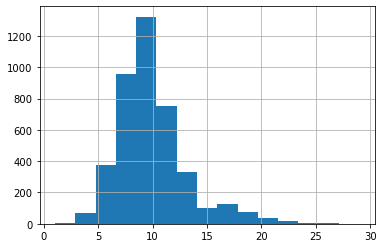

In [45]:
abalone['Rings'].hist(bins=15)
plt.show()

In [46]:
corr_matrix = abalone.corr()

In [47]:
corr_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [48]:
X = abalone.drop('Rings', axis=1)
X = X.values
y = abalone['Rings']
y = y.values

In [49]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [50]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [51]:
# pick a random set of rows and use them for training and testing
# during training we are going to give the model answers
# during testing we are not
# finally, we are going to compare the data from the test to the actual data in y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12345)

In [52]:
y_train

array([ 9, 17, 11, ...,  8, 14,  8], dtype=int64)

In [53]:
len(y_test)

836

In [55]:
# instantiate the model and train it on my training data
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [56]:
# now that we have a fit model, test it on my testing data
test_preds = knn_model.predict(X_test)

In [57]:
test_preds

array([15.66666667, 11.        ,  8.66666667, 11.66666667,  9.66666667,
        9.66666667,  9.        ,  9.        , 11.66666667, 11.33333333,
        8.33333333,  9.        , 14.66666667,  9.33333333, 14.        ,
        9.33333333, 11.        , 10.        , 10.66666667, 15.66666667,
       10.33333333,  7.33333333, 10.33333333, 10.66666667, 10.33333333,
        8.33333333,  9.33333333,  8.33333333,  9.66666667, 14.        ,
       11.33333333, 11.66666667, 13.        ,  9.66666667,  7.66666667,
        9.66666667,  8.66666667,  6.33333333,  7.        ,  9.66666667,
       12.        ,  9.        , 10.66666667, 18.        ,  8.        ,
        9.66666667, 13.33333333,  9.66666667,  6.        ,  9.33333333,
        9.66666667,  9.        , 11.66666667,  9.33333333,  9.        ,
       12.66666667,  7.        , 11.33333333,  9.66666667, 10.33333333,
       10.        ,  7.        ,  7.        , 10.        , 18.66666667,
       12.        ,  9.66666667, 11.66666667,  8.66666667, 10.33

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# to gauge how good our model is, we are going to use the root_mean_squared error
# this gives us an average error
mse = mean_squared_error(y_test,test_preds)
mse = sqrt(mse)

In [61]:
mse

2.375417924000521